# Retrieving meaningful dimensions using AABCC score

We find that AABCC score and correlation rank overlap only for the top ~50 dimensions. The overall distributions of values are also similar.

## 1. Gender  
In this Notebook, we will implement and use a new metric to measure the meaningfulness of a WE dimension for a classification task.

In [1]:
import pandas as pd
df_n = pd.read_csv("../Data/all_nouns_we.csv")
df_n["gender"] = df_n["gender"].apply(lambda x:"F" if x=="feminine" else "M") 
df_n.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,504,505,506,507,508,509,510,511,gn,gender
0,abaisse,4.652041,-4.028067,0.883202,4.782082,-2.294611,-3.894453,-0.810279,-0.713933,4.819906,...,-1.768522,0.557448,-1.204734,-5.865204,-7.542219,-4.662949,-0.546076,-1.836027,singular,F
1,abandonnée,3.936752,1.365095,0.601899,-3.841945,0.137241,-6.720108,-4.014627,-0.164519,-4.163124,...,-1.122231,-4.691674,-1.861967,-7.399371,-3.871466,-4.995701,4.840463,-0.697731,singular,F
2,abattue,5.501807,0.974496,1.963397,-0.096684,-0.317693,-5.214660,-1.325345,1.782016,2.419068,...,-1.418699,-2.060775,-4.221079,-9.340311,-6.799405,-3.366512,-1.183914,-0.273903,singular,F
3,abbaye,4.343249,-4.697087,1.981792,0.167565,4.937754,-5.705141,-4.314447,-2.714383,-1.888555,...,4.184031,3.421206,-1.783199,-6.933277,-5.636909,3.233929,-3.364212,-5.757182,singular,F
4,abdominale,4.454150,-0.297545,4.704999,0.880275,0.379564,-3.872901,-2.538447,-7.180586,10.115621,...,-0.737049,-1.824200,-0.034769,-2.647907,-4.493944,-0.005413,4.762722,-5.029149,singular,F


### 1.1 Test on 1 column

In [2]:
df_n.sort_values("0")[["0", "gender"]]

,0,gender
2522,-7.234042,F
12489,-6.904568,M
11048,-6.609836,M
5652,-6.572830,F
4652,-6.460532,F
...,...,...
1571,12.605267,F
1598,12.682314,F
11169,13.303518,M
2926,13.810582,F


In [3]:
def get_sequence(df:pd.DataFrame, dim:int, feature:str):
    return list(df.sort_values(str(dim))[feature])

def get_score_for_sequence(seq:list):
    
    # initialisation
    score = 0
    i = 0 # current index
    val = seq[0] # current value

    while i < len(seq):
        j = 0 # consecutive values counter

        while i < len(seq) and seq[i] == val:
            j += 1
            i += 1
        
        score += sum([i for i in range(j+1)])
        
        if i < len(seq):
             val = seq[i]

    return score


In [4]:
seq = list("aabbbabab") # should be 3 + 6 + 1 + 1 + 1 + 1 = 13
get_score_for_sequence(seq)

13

### 1.2 Generalisation to all the columns

In [5]:
d = {}
for i in range(512):
    seq = get_sequence(df_n, i, "gender")
    d[i] = get_score_for_sequence(seq)

Printing the top dimensions (having the highest scores)

In [6]:
sorted_ = sorted(d.items(), key = lambda x:x[1], reverse=True) # sorting the dimensions by score
sorted_

[(100, 29081),
 (192, 28850),
 (403, 28665),
 (245, 28646),
 (377, 28625),
 (316, 28456),
 (195, 28382),
 (121, 28331),
 (507, 28139),
 (202, 28125),
 (117, 28112),
 (28, 28084),
 (74, 27987),
 (239, 27978),
 (310, 27942),
 (470, 27937),
 (362, 27926),
 (318, 27855),
 (274, 27842),
 (434, 27823),
 (477, 27804),
 (472, 27802),
 (443, 27769),
 (40, 27749),
 (306, 27732),
 (487, 27701),
 (237, 27683),
 (461, 27656),
 (256, 27655),
 (59, 27642),
 (389, 27632),
 (193, 27565),
 (326, 27558),
 (188, 27539),
 (455, 27523),
 (421, 27522),
 (439, 27521),
 (510, 27515),
 (55, 27503),
 (198, 27494),
 (296, 27490),
 (20, 27474),
 (474, 27459),
 (508, 27458),
 (207, 27455),
 (292, 27454),
 (41, 27438),
 (49, 27430),
 (321, 27426),
 (29, 27425),
 (119, 27423),
 (215, 27417),
 (174, 27414),
 (21, 27412),
 (179, 27410),
 (250, 27409),
 (374, 27395),
 (162, 27392),
 (176, 27392),
 (312, 27390),
 (276, 27387),
 (144, 27381),
 (51, 27379),
 (268, 27351),
 (6, 27348),
 (39, 27347),
 (432, 27336),
 (7, 2732

Comparing this sorting with the dimensions that have the highest correlation with gender information.

In [7]:
# Encoding gender as 1 (F) and 0 (M)
df_n["gender-01"] = df_n["gender"].apply(lambda x:1 if x=="F" else 0)

# Get the correlation between dimensions and the gender-01
import numpy as np
gender_corr_df = pd.DataFrame(columns=["dimension", "correlation_with_gender"])
gender_list = []

for i in range(512):
    gender_list.append(df_n.loc[:,[str(i), 'gender-01']].corr().iloc[0][-1])

gender_corr_df["dimension"] = range(512)
gender_corr_df["correlation_with_gender"] = gender_list
gender_corr_df["sign"] = np.sign(gender_corr_df["correlation_with_gender"])
gender_corr_df["abs"] = abs(gender_corr_df["correlation_with_gender"])

In [8]:
# sort by absolute value of correlation 
gender_corr_df = gender_corr_df.sort_values("abs", ascending=False)
gender_corr_df["corr-rank"] = gender_corr_df["abs"].rank(ascending=False)
gender_corr_df["aabcc"] = gender_corr_df["dimension"].apply(lambda x:d[x])
gender_corr_df["aabcc-rank"] = gender_corr_df["aabcc"].rank(ascending=False)
gender_corr_df

,dimension,correlation_with_gender,sign,abs,corr-rank,aabcc,aabcc-rank
100,100,0.201022,1.0,0.201022,1.0,29081,1.0
195,195,0.198300,1.0,0.198300,2.0,28382,7.0
316,316,-0.192950,-1.0,0.192950,3.0,28456,6.0
245,245,-0.181808,-1.0,0.181808,4.0,28646,4.0
507,507,-0.179582,-1.0,0.179582,5.0,28139,9.0
...,...,...,...,...,...,...,...
401,401,-0.000854,-1.0,0.000854,508.0,26271,478.0
67,67,0.000692,1.0,0.000692,509.0,26959,185.5
35,35,0.000605,1.0,0.000605,510.0,26838,242.5
272,272,-0.000249,-1.0,0.000249,511.0,26827,247.0


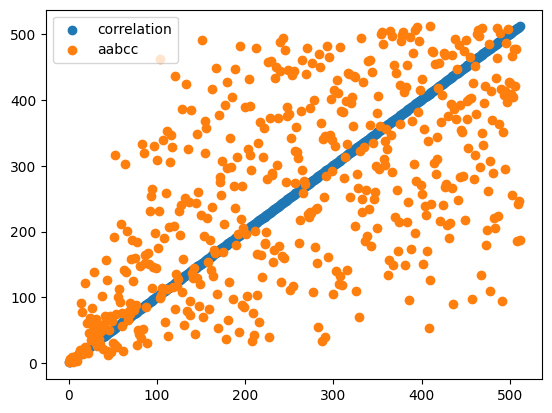

In [9]:
from matplotlib import pyplot as plt

plt.scatter(range(512), gender_corr_df["corr-rank"], label="correlation")
plt.scatter(range(512), gender_corr_df["aabcc-rank"], label="aabcc")
plt.legend()
plt.show()

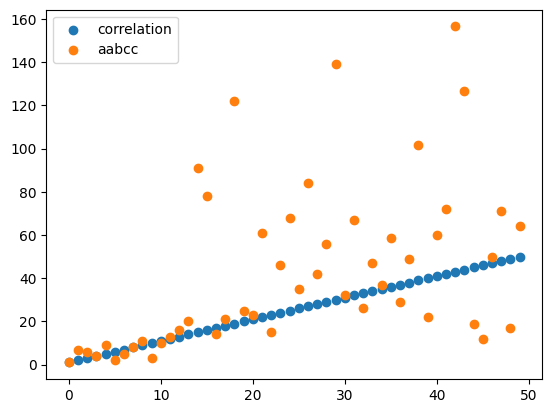

In [10]:
# For the 50 first dimensions only 
plt.scatter(range(50), list(gender_corr_df["corr-rank"])[:50], label="correlation")
plt.scatter(range(50), list(gender_corr_df["aabcc-rank"])[:50], label="aabcc")
plt.legend()
plt.show()

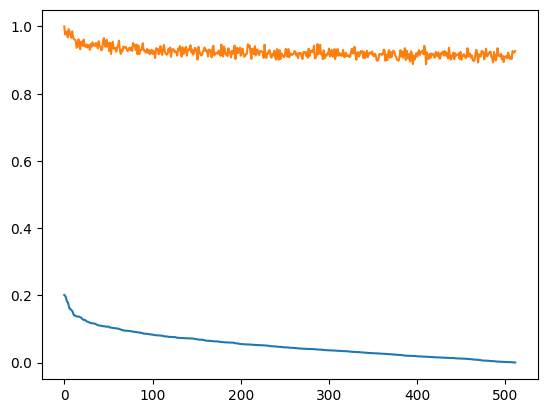

In [11]:
plt.plot(list(abs(gender_corr_df["correlation_with_gender"])), label="correlation")
max_aabcc = max(list(gender_corr_df["aabcc"]))
plt.plot(list(gender_corr_df["aabcc"]/max_aabcc), label="aabcc")

## 2. Number

In [12]:
df_n["nb"] = df_n["gn"]
df_n.drop(columns=["gn"], inplace=True)
df_n["nb-01"] = df_n["nb"].apply(lambda x:1 if x=="plural" else 0)

In [13]:
d = {}
for i in range(512):
    seq = get_sequence(df_n, i, "nb")
    d[i] = get_score_for_sequence(seq)

sorted_ = sorted(d.items(), key = lambda x:x[1], reverse=True) # sorting the dimensions by score
sorted_

[(310, 60625),
 (54, 46034),
 (288, 42679),
 (285, 42037),
 (278, 40910),
 (384, 40555),
 (81, 40216),
 (25, 39039),
 (250, 38996),
 (172, 38891),
 (359, 38843),
 (289, 37102),
 (243, 36773),
 (507, 36715),
 (200, 36432),
 (495, 36411),
 (182, 36323),
 (5, 36240),
 (309, 36161),
 (296, 36092),
 (360, 36013),
 (369, 35988),
 (158, 35980),
 (430, 35895),
 (57, 35870),
 (117, 35778),
 (274, 35751),
 (420, 35703),
 (56, 35625),
 (67, 35611),
 (3, 35544),
 (208, 35527),
 (311, 35473),
 (84, 35445),
 (8, 35328),
 (129, 35226),
 (175, 35146),
 (160, 35069),
 (83, 35030),
 (328, 34983),
 (487, 34957),
 (204, 34943),
 (461, 34898),
 (362, 34870),
 (303, 34857),
 (374, 34832),
 (167, 34788),
 (246, 34787),
 (455, 34756),
 (136, 34746),
 (297, 34727),
 (205, 34620),
 (194, 34554),
 (281, 34500),
 (105, 34469),
 (257, 34397),
 (183, 34332),
 (229, 34290),
 (511, 34270),
 (451, 34228),
 (419, 34218),
 (219, 34209),
 (381, 34206),
 (485, 34186),
 (185, 34161),
 (337, 34155),
 (377, 34145),
 (213, 34

In [14]:
import numpy as np
nb_corr_df = pd.DataFrame(columns=["dimension", "correlation_with_nb"])
nb_list = []

for i in range(512):
    nb_list.append(df_n.loc[:,[str(i), 'nb-01']].corr().iloc[0][-1])

nb_corr_df["dimension"] = range(512)
nb_corr_df["correlation_with_nb"] = nb_list
nb_corr_df["sign"] = np.sign(nb_corr_df["correlation_with_nb"])
nb_corr_df["abs"] = abs(nb_corr_df["correlation_with_nb"])
nb_corr_df = nb_corr_df.sort_values("abs", ascending=False)
nb_corr_df["corr-rank"] = nb_corr_df["abs"].rank(ascending=False)
nb_corr_df["aabcc"] = nb_corr_df["dimension"].apply(lambda x:d[x])
nb_corr_df["aabcc-rank"] = nb_corr_df["aabcc"].rank(ascending=False)
nb_corr_df

,dimension,correlation_with_nb,sign,abs,corr-rank,aabcc,aabcc-rank
310,310,-0.415214,-1.0,0.415214,1.0,60625,1.0
54,54,-0.335934,-1.0,0.335934,2.0,46034,2.0
285,285,-0.302499,-1.0,0.302499,3.0,42037,4.0
278,278,0.298213,1.0,0.298213,4.0,40910,5.0
288,288,0.294037,1.0,0.294037,5.0,42679,3.0
...,...,...,...,...,...,...,...
275,275,0.001004,1.0,0.001004,508.0,31675,442.0
70,70,-0.000549,-1.0,0.000549,509.0,31720,428.0
388,388,-0.000479,-1.0,0.000479,510.0,31715,430.5
100,100,-0.000360,-1.0,0.000360,511.0,32601,227.5


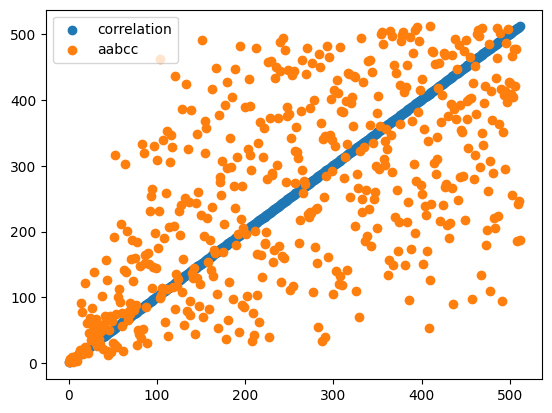

In [15]:
from matplotlib import pyplot as plt

plt.scatter(range(512), gender_corr_df["corr-rank"], label="correlation")
plt.scatter(range(512), gender_corr_df["aabcc-rank"], label="aabcc")
plt.legend()
plt.show()

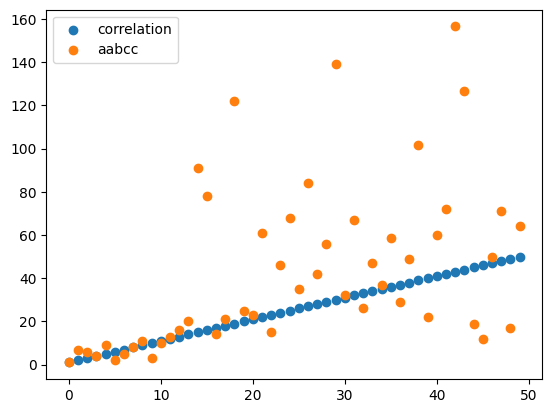

In [16]:
# For the 50 first dimensions only 
plt.scatter(range(50), list(gender_corr_df["corr-rank"])[:50], label="correlation")
plt.scatter(range(50), list(gender_corr_df["aabcc-rank"])[:50], label="aabcc")
plt.legend()
plt.show()

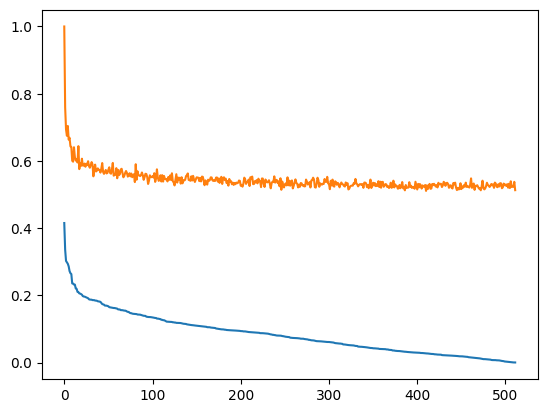

In [17]:
plt.plot(list(abs(nb_corr_df["correlation_with_nb"])), label="correlation")
max_aabcc = max(list(nb_corr_df["aabcc"]))
plt.plot(list(nb_corr_df["aabcc"]/max_aabcc), label="aabcc")